In [179]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [180]:
# Importing the data / Leitura dos dados

url_hypotheses_us_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Making_Decisions_Based_In_Data/refs/heads/main/hypotheses_us.csv'

hypotheses_log = pd.read_csv(url_hypotheses_us_log, sep = ';')

url_orders_us_log ='https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Making_Decisions_Based_In_Data/refs/heads/main/orders_us.csv'

orders_log = pd.read_csv(url_orders_us_log, sep = ',')

url_visits_us_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Making_Decisions_Based_In_Data/refs/heads/main/visits_us.csv'

visits_log = pd.read_csv(url_visits_us_log, sep = ',')

## Data Cleaning / Limpeza dos Dados

### Hyphotheses Log

In [181]:
hypotheses_log.info()
print()
hypotheses_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes



,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [182]:
hypotheses_log.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [183]:
hypotheses_log.columns = hypotheses_log.columns.str.lower()

In [184]:
hypotheses_log.info()
print()
hypotheses_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes



,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [185]:
hypotheses_log.duplicated().sum()

0

### Orders Log

In [186]:
orders_log.info()
print()
orders_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [187]:
orders_log.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [188]:
orders_log['date'] = pd.to_datetime(orders_log['date'])

In [189]:
orders_log = orders_log.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [190]:
orders_log.info()
print()
orders_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB



,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [191]:
orders_log.duplicated().sum()

0

### Visits Log

In [192]:
visits_log.info()
print()
visits_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [193]:
visits_log.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [194]:
visits_log['date'] = pd.to_datetime(visits_log['date'])

In [195]:
visits_log.info()
print()
visits_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [196]:
visits_log.duplicated().sum()

0

### Conclusion Data Cleaning /Conclusão Limpeza dos Dados

- Hypotheses Log

    - Temos um dataframe com 9 entradas, que neste caso são hipóteses a serem testadas, bem como os dados de alcance, impacto, confiança e os recursos necessários para o teste da mesma. Não existe valores duplicados, a nível de valores temos uma mescla de valores uma vez que todas as colunas são de 0 a 10, além disso foram feitos ajustes nas colunas para deixar todas com letras minúsculas, contudo, de resto os dados estão ok.

- Orders Log

    - Um total de 1197 entradas, sem valores nulos/ausentes ou duplicados, onde temos todos os dados relacionados as vendas, como: identificador do pedido, identificador do usuário que fez o pedido, a data do pedido, o valor/receita do pedido e o grupo do teste A/B que o usuário fez parte. Para este dataframe os ajustes feitos foram transformar a coluna de data para o formato correto, bem como correção no título das colunas 'transaction_id' e 'visitor_id', sendo adicionado o " _ " para melhor leitura. Um ponto importante que podemos notar desde o início são os valores das receitas onde temos uma média de valor gasto de 131.49, tendo como o valor mínimo de compra 5.0 e o valor máximo 19920.40.

- Visits Log

    - Identificamos 62 entradas, sem valores nulos/ausentes ou duplicados, que são correspondente a data de visita no site, o grupo do teste A/B que faz parte e o número de visitas naquela data específica para o grupo do teste A/B especificado. Foi feito o ajuste da coluna date para o formato correto. Para uma visualização inicial dos dados, podemos identificar que começam no dia 01/08/2019 até 31/08/2019 (valores máximos e mínimos referentes as datas), já com as visitas houve uma média de 607.29 visitas, com um máximo de 770.0 e um mínimo de 361.0.

## Data Analysis / Análise dos Dados

### Checking Hypotheses / Checagem as Hipóteses

In [197]:
hypotheses_log['ICE'] =(
                        hypotheses_log['impact']
                        * hypotheses_log['confidence']
) / hypotheses_log['effort']

hypotheses_log.head()

,hypothesis,reach,impact,confidence,effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [198]:
hypotheses_log['RICE'] =(
                        hypotheses_log['reach']
                        * hypotheses_log['impact']
                        * hypotheses_log['confidence']
) / hypotheses_log['effort']

hypotheses_log

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


### Checking Hypotheses Conclusion / Conclusão da Checagem das Hipóteses

Podemos reparar que hipóteses com alto alcance, coluna 'reach' com número próximo a 10 (valor máximo), tendem a ter uma prioridade maior em RICE do que em ICE, como por exemplo a hipótese 7 que tem um valor de 10 em 'reach' e consequentemente o valor de RICE (112.0) é muito 10x maior que o valor de ICE (11.20).

Quando o valor da coluna de alcance ('reach') tem um valor baixo, os valores da coluna RICE e ICE a ser semelhante ou até mesmo igual, como por exemplo a hipótese 8 que tem o valor de 1 em 'reach' e os valores de RICE E ICE é igual (16.2) ou até mesmo a hipótese 1 que tem um 'reach' de 2 e uma diferença mínima entre RICE (4.0) e ICE (2.0)

Essas variações podem acontecer porque ao incluir o fator 'reach' no cálculo do método, irá beneficia alterações que afetam um número maior de usuários, independentemente do esforço ou do impacto individual. Em contrapartida, o ICE prioriza apenas a combinação de impacto, confiança e esforço, ignorando o número de pessoas impactadas.

### A/B Test / Teste A/B

In [199]:
revenue_cumulative = orders_log.groupby(['date', 'group']).agg({'revenue': 'sum', 'transaction_id': 'nunique'}).reset_index()
revenue_cumulative['revenue'] = revenue_cumulative['revenue'].astype(int)
revenue_cumulative.head(5)

,date,group,revenue,transaction_id
0,2019-08-01,A,2356,24
1,2019-08-01,B,1620,21
2,2019-08-02,A,1503,20
3,2019-08-02,B,2623,24
4,2019-08-03,A,1815,24


In [200]:
revenue_cumulative['cumulative_revenue'] = revenue_cumulative.groupby('group')['revenue'].cumsum()
revenue_cumulative['cumulative_orders'] = revenue_cumulative.groupby('group')['transaction_id'].cumsum()
revenue_cumulative.head(5)

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders
0,2019-08-01,A,2356,24,2356,24
1,2019-08-01,B,1620,21,1620,21
2,2019-08-02,A,1503,20,3859,44
3,2019-08-02,B,2623,24,4243,45
4,2019-08-03,A,1815,24,5674,68


In [201]:
revenue_cumulative['orders_mean'] = revenue_cumulative['cumulative_revenue'] / revenue_cumulative['cumulative_orders']
revenue_cumulative.head(5)

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders,orders_mean
0,2019-08-01,A,2356,24,2356,24,98.166667
1,2019-08-01,B,1620,21,1620,21,77.142857
2,2019-08-02,A,1503,20,3859,44,87.704545
3,2019-08-02,B,2623,24,4243,45,94.288889
4,2019-08-03,A,1815,24,5674,68,83.441176


In [202]:
visits_grouped = visits_log.groupby(['date', 'group']).agg({'visits': 'sum'}).reset_index()
visits_grouped.columns = ['date', 'group', 'visits_sum']
visits_grouped

,date,group,visits_sum
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
...,...,...,...
57,2019-08-29,B,531
58,2019-08-30,A,490
59,2019-08-30,B,490
60,2019-08-31,A,699


In [203]:
visits_grouped['cumulative_orders_sum'] = visits_grouped.groupby('group')['visits_sum'].cumsum()
visits_grouped

,date,group,visits_sum,cumulative_orders_sum
0,2019-08-01,A,719,719
1,2019-08-01,B,713,713
2,2019-08-02,A,619,1338
3,2019-08-02,B,581,1294
4,2019-08-03,A,507,1845
...,...,...,...,...
57,2019-08-29,B,531,17708
58,2019-08-30,A,490,18037
59,2019-08-30,B,490,18198
60,2019-08-31,A,699,18736


In [204]:
data_total = pd.merge(revenue_cumulative, visits_grouped, how = 'left', on = ['date', 'group'])
data_total

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders,orders_mean,visits_sum,cumulative_orders_sum
0,2019-08-01,A,2356,24,2356,24,98.166667,719,719
1,2019-08-01,B,1620,21,1620,21,77.142857,713,713
2,2019-08-02,A,1503,20,3859,44,87.704545,619,1338
3,2019-08-02,B,2623,24,4243,45,94.288889,581,1294
4,2019-08-03,A,1815,24,5674,68,83.441176,507,1845
...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,3623,20,87328,596,146.523490,531,17708
58,2019-08-30,A,1364,11,63549,545,116.603670,490,18037
59,2019-08-30,B,3393,24,90721,620,146.324194,490,18198
60,2019-08-31,A,991,12,64540,557,115.870736,699,18736


#### Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.

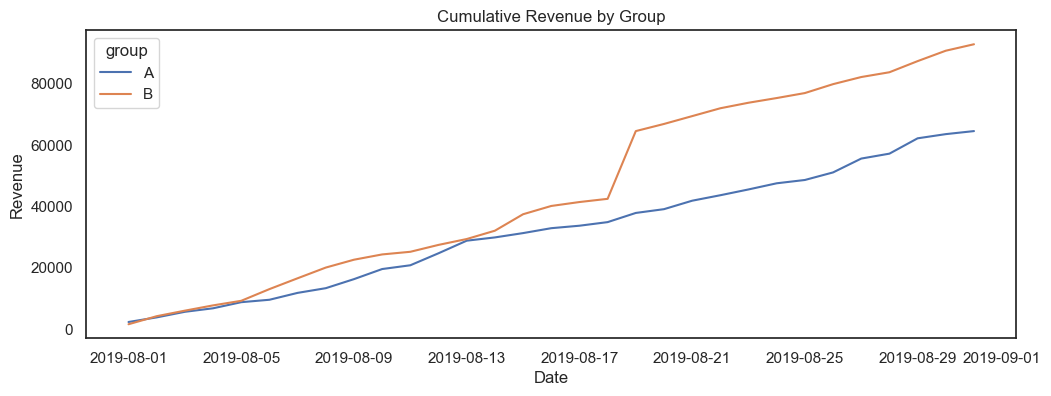

In [205]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'cumulative_revenue', hue = 'group', data = data_total)
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

#### Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.

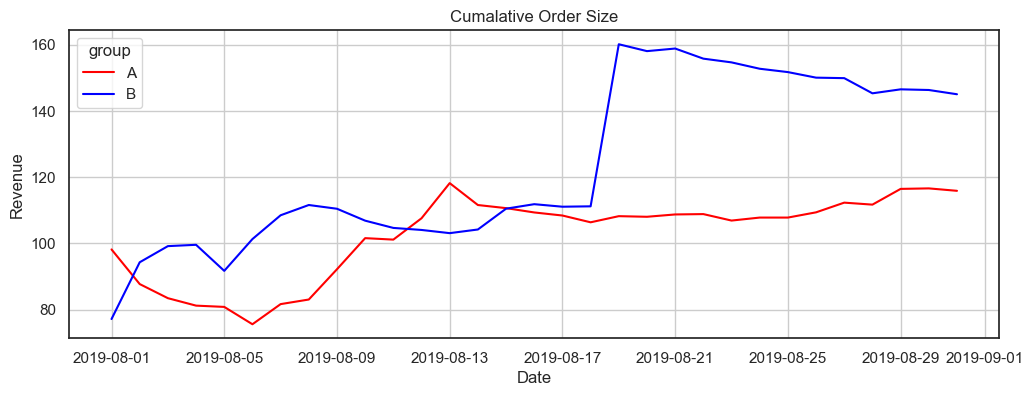

In [206]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'orders_mean', hue = 'group', palette=['red', 'blue'], data = data_total)
plt.title('Cumalative Order Size')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()

#### Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Faça conclusões e crie conjecturas.

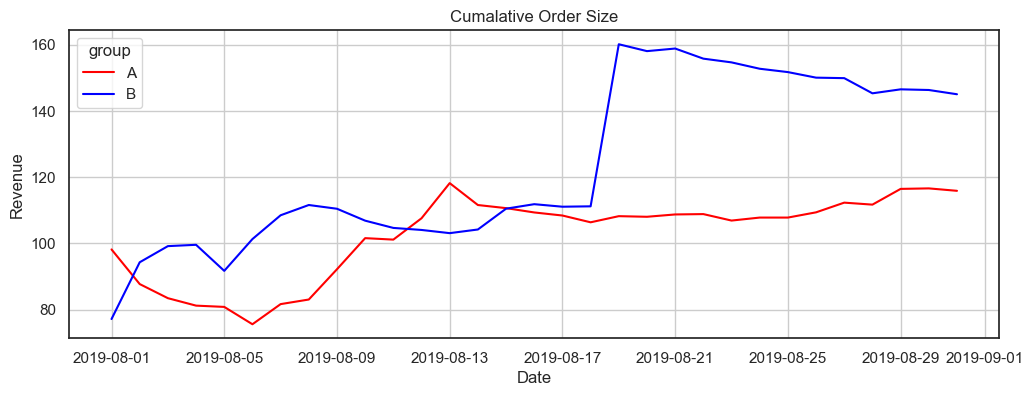

In [207]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'orders_mean', hue = 'group', palette=['red', 'blue'], data = data_total)
plt.title('Cumalative Order Size')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()

#### Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.

In [208]:
data_total.head()

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders,orders_mean,visits_sum,cumulative_orders_sum
0,2019-08-01,A,2356,24,2356,24,98.166667,719,719
1,2019-08-01,B,1620,21,1620,21,77.142857,713,713
2,2019-08-02,A,1503,20,3859,44,87.704545,619,1338
3,2019-08-02,B,2623,24,4243,45,94.288889,581,1294
4,2019-08-03,A,1815,24,5674,68,83.441176,507,1845


In [209]:
data_total['conversion_rate'] = data_total['transaction_id'] / data_total['visits_sum']
data_total

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders,orders_mean,visits_sum,cumulative_orders_sum,conversion_rate
0,2019-08-01,A,2356,24,2356,24,98.166667,719,719,0.033380
1,2019-08-01,B,1620,21,1620,21,77.142857,713,713,0.029453
2,2019-08-02,A,1503,20,3859,44,87.704545,619,1338,0.032310
3,2019-08-02,B,2623,24,4243,45,94.288889,581,1294,0.041308
4,2019-08-03,A,1815,24,5674,68,83.441176,507,1845,0.047337
...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,3623,20,87328,596,146.523490,531,17708,0.037665
58,2019-08-30,A,1364,11,63549,545,116.603670,490,18037,0.022449
59,2019-08-30,B,3393,24,90721,620,146.324194,490,18198,0.048980
60,2019-08-31,A,991,12,64540,557,115.870736,699,18736,0.017167


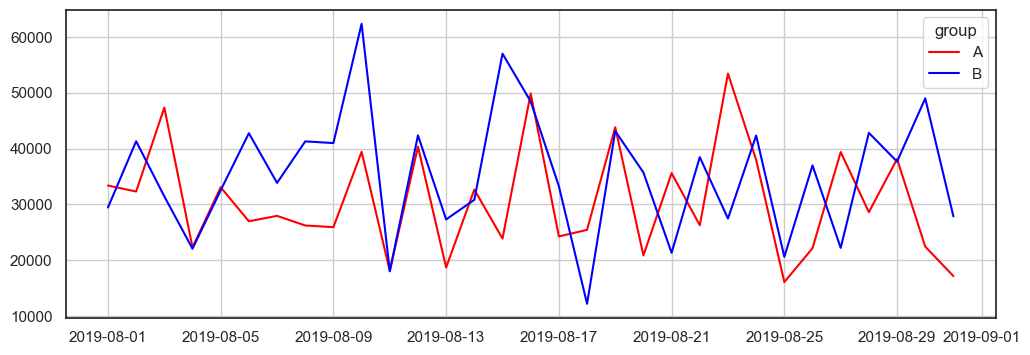

In [216]:
data_total['conversion_rate'] = data_total['conversion_rate'] * 100
data_total['conversion_rate']



plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'conversion_rate', hue = 'group', palette=['red', 'blue'], data = data_total)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.grid()
plt.show()

#### Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.

C:\Users\Rafael\AppData\Local\Temp\ipykernel_22884\3506561337.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = 'date', y= 'cumsum_convertion_rate', palette=['red', 'blue'], data = conversion_data)


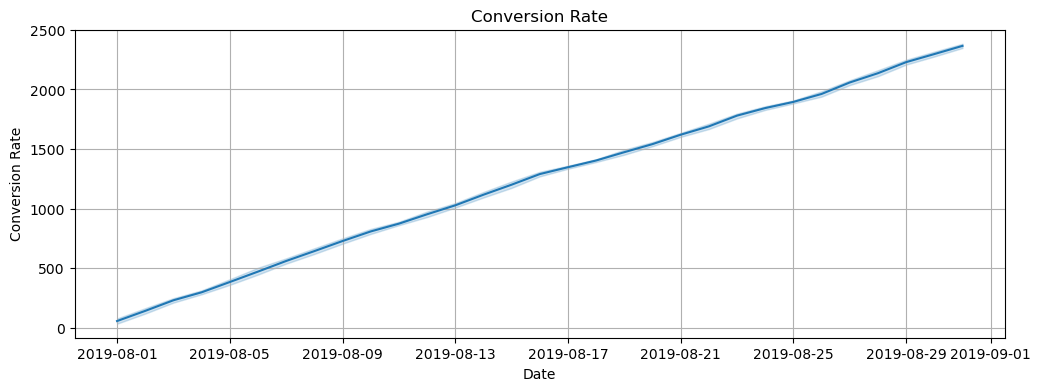

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'cumsum_convertion_rate', palette=['red', 'blue'], data = conversion_data)
plt.title('Conversion Rate')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.grid()
plt.show()

#### Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [171]:
orders_log.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [172]:
orders_per_user = orders_log.groupby('visitor_id').agg({'transaction_id': 'nunique'}).reset_index()
orders_per_user.rename(columns = {'transaction_id': 'count'}, inplace = True)
orders_per_user.head(5)

,visitor_id,count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [ ]:
percentile_95 = np.percentile(orders_per_user['count'], 0.95)
percentile_99 = np.percentile(orders_per_user['count'], 0.99)

print(f'95 percentile: {percentile_95}')
print(f'99 percentile: {percentile_99}')

95 percentile: 1.0
99 percentile: 1.0


In [174]:
anomalies = orders_per_user[orders_per_user['count'] > percentile_99]

print('Dados se tornam anomalia a partir do 99 percentile: ', percentile_99)

Dados se tornam anomalia a partir do 99 percentile:  1.0


#### Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.

In [ ]:
orders_log

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


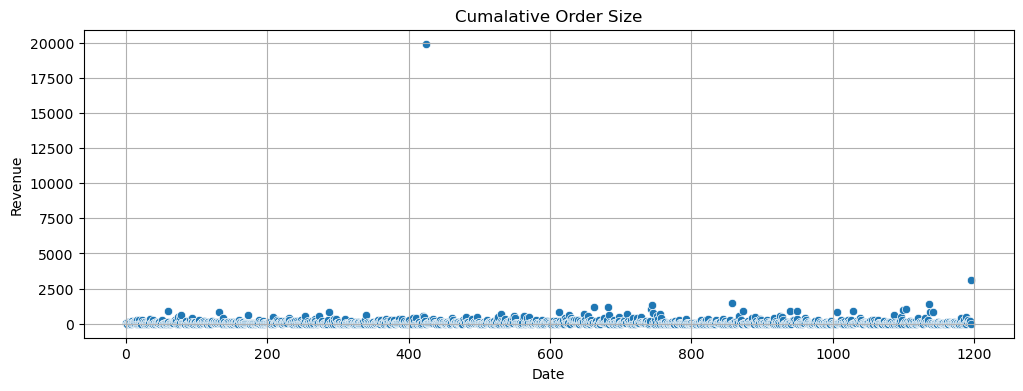

In [176]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x = range(len(orders_log)), y= 'revenue', data = orders_log, legend = None)
plt.title('Cumalative Order Size')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()

#### Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.

#### Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

#### Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

#### Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

#### Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

#### Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.